
**REGRESSION LOGISTIQUE 2024 SUR LES IRIS DE FISHER **

Première partie du TP où l'on s'entraîne sur la base de données des iris de Fisher. Elle est constituée de $n=150$ fleurs caractérisées par la longueur et la largeur des sépales, la longueur et la largeur des pétales (en cm). Les trois classes d'iris sont setosa, virginica, versicolor.
On veut effectuer une classification à partir des deux premières caractéristiques (largeur et longueur des sépales).

In [1]:
# Librairies l'environnement
%matplotlib inline
!pip install pandas
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelBinarizer
from scipy.stats import chi2
from scipy import stats

On commence par effectuer quelques statistiques descriptives et visualisations des données.

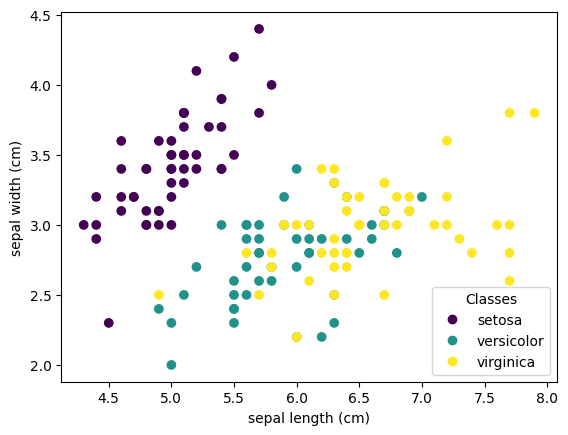

In [2]:
# Chargement de base de données iris
iris = datasets.load_iris()
# Affichage de chacune des 3 classes selon deux dimensions (les 2 premières variables sur 4)
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

In [3]:
# A quoi ressemble les 5 premières lignes de la matrice de données ?
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
type(iris.data)

numpy.ndarray

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
(150, 6)
(150, 6)
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='species'>

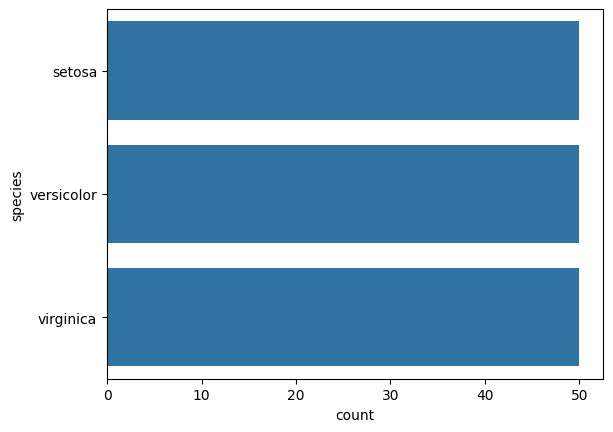

In [5]:
# Quelques statistiques descriptives.
# On commence par transformer iris en un dataframe appelé dfiris.
# Il va contenir 6 colonnes : 4 pour les variables, 1 pour le numéro d'espèce et 1 pour le nom de l'espèce.
dfiris = pd.DataFrame(data=np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target']).astype({'target': int}) \
       .assign(species=lambda x: x['target'].map(dict(enumerate(iris['target_names']))))
dfiris.info()
print(dfiris.shape)
list(iris.target_names)
print(dfiris.shape)
# Effectif de chaque classe.
print(dfiris['species'].value_counts())
sns.countplot(dfiris['species'])

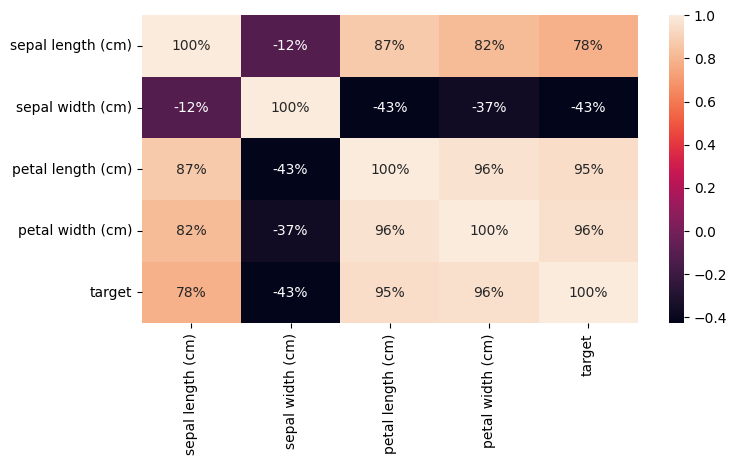

In [6]:
# Matrice de corrélation entre les variables.
plt.figure(figsize=(8,4))
sns.heatmap(dfiris.drop('species', axis=1).corr(),annot=True,fmt=".0%")
plt.show()

In [7]:
# On effectue une ACP pour visualiser autrement le nuage de dimension 4.
from sklearn.decomposition import PCA
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0],X_reduced[:, 1],X_reduced[:, 2],c=iris.target,s=40,)
ax.set_title("ACP en 3 dimensions")
ax.set_xlabel("1er vecteur propre")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2e vecteur propre")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3e vecteur propre")
ax.zaxis.set_ticklabels([])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

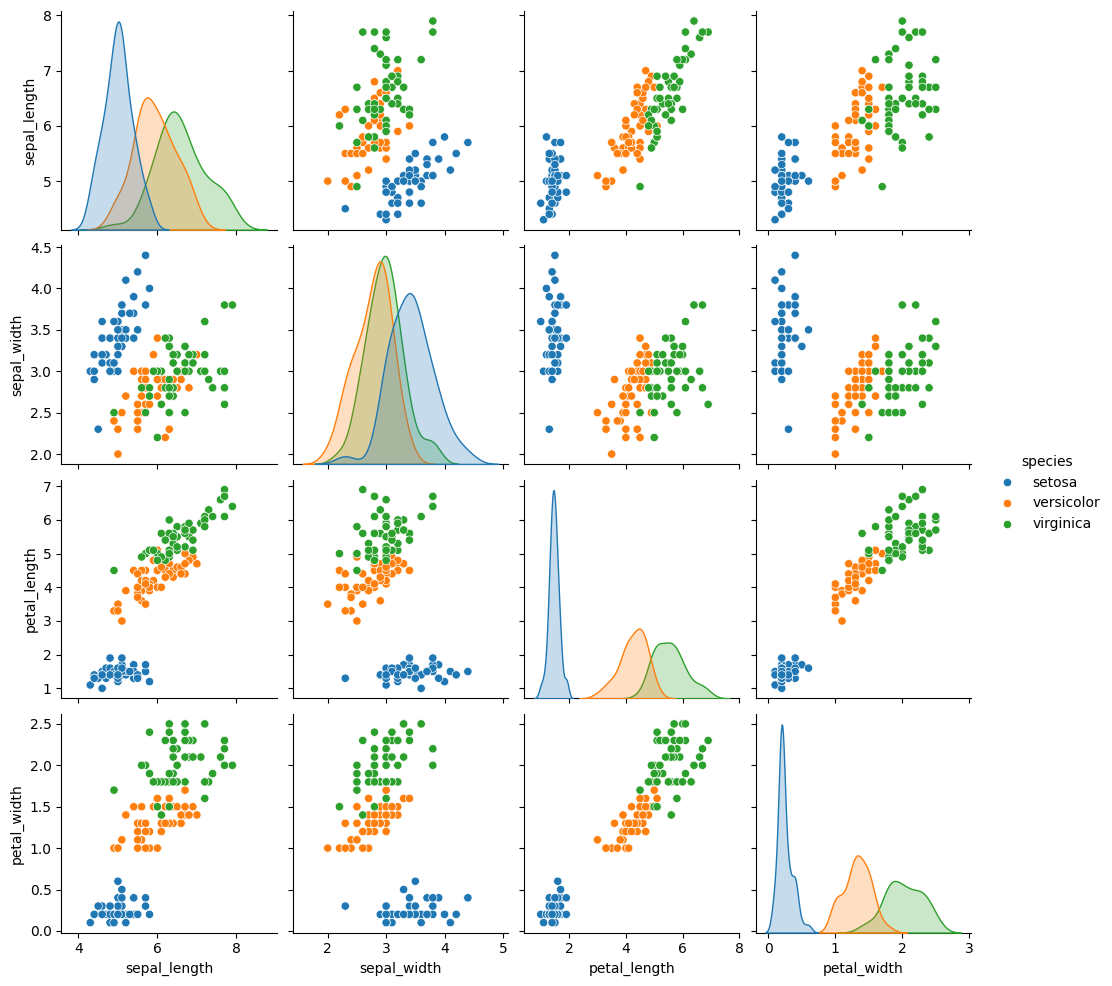

In [8]:
data = load_iris()
iris = sns.load_dataset("iris")
# sns.pairplot trace le nuage selon toutes les paires de dimensions possibles.
# Sur la diagonale, on trouve l'histogramme des valeurs de la variable considérée,
# pour chaque classe.
sns.pairplot(iris, hue="species")

Régression logistique binaire effectuée en fusionnant les deux premières espèces.

In [17]:
# Exemple de régression logistique sur une variable qualitative binaire
# Chargement de base de données iris
iris = datasets.load_iris()
# Choix de deux variables parmi les quatre:
# on utilise les deux premières colonnes.
X = iris.data[:, :2]
# Re-étiquetage des fleurs (on fusionne les classes 1 et 2)
y = (iris.target != 0) * 1
# Visualisation des données
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='y', label='1')
plt.legend();
# Construction d'un objet "régression logistique"
model = LogisticRegression()
# Entrainement du modèle sur les données
model.fit(X, y)
# On veut prédire les classes de 4 points du nuage
testpred = [[5.5, 2.5],[7, 3],[3,2],[5,3]]
ypred = model.predict(testpred)
print(ypred)

[1 1 0 0]


In [21]:
print(model.summary())

AttributeError: 'LogisticRegression' object has no attribute 'summary'

In [18]:
# Construction d'un tableau récapitulatif du modèle
lr = sm.Logit(y, sm.add_constant(X)).fit(disp=False)
result = zip(['(Intercept)'] + list(iris.feature_names), lr.params, lr.bse, lr.tvalues)
print('               Coefficient   Std. Error   Z Score')
print('-------------------------------------------------')
for term, coefficient, std_err, z_score in result:
    print(f'{term:>12}{coefficient:>14.3f}{std_err:>13.3f}{z_score:>10.3f}')

               Coefficient   Std. Error   Z Score
-------------------------------------------------
 (Intercept)      -436.770   543116.774    -0.001
sepal length (cm)       166.783   212829.619     0.001
sepal width (cm)      -143.549   189331.353    -0.001


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
print(lr.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  150
Model:                          Logit   Df Residuals:                      147
Method:                           MLE   Df Model:                            2
Date:                Sat, 05 Oct 2024   Pseudo R-squ.:                   1.000
Time:                        09:41:41   Log-Likelihood:            -7.5605e-08
converged:                      False   LL-Null:                       -95.477
Covariance Type:            nonrobust   LLR p-value:                 3.426e-42
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -436.7700   5.43e+05     -0.001      0.999   -1.06e+06    1.06e+06
x1           166.7834   2.13e+05      0.001      0.999   -4.17e+05    4.17e+05
x2          -143.5493   1.89e+05     -0.001      0.9

Régression logistiquepolytomique et prévision de 5 valeurs. Les données d'entrainement corerspondent à 25% de la base et on régresse ici sur toutes les variables.

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.25,random_state=0)
LogR=LogisticRegression()
LogR.fit(X_train, Y_train)
ypred=LogR.predict(X_test)
print("Train Shape",X_train.shape)
print("Test Shape",X_test.shape)
# Prévision de 5 valeurs.
print (ypred [0:5])
print (Y_test [0:5])

Train Shape (112, 4)
Test Shape (38, 4)
[2 1 0 2 0]
[2 1 0 2 0]


In [16]:
# Qualité de la régression (vite fait)
from sklearn import metrics
print('Performance:', metrics.accuracy_score(Y_test, ypred)* 100,'%')
from sklearn.metrics import classification_report
print(classification_report(Y_test, ypred))
print('Taux de réussite:',metrics.accuracy_score(ypred,Y_test))


Performance: 97.36842105263158 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

Taux de réussite: 0.9736842105263158


In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, ypred)
print(cm)
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Matrice de confusion')
plt.show()

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
